In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/DATA-5500.xlsx',header=None)

In [4]:
df.columns=["Roulette_Number"]

In [5]:
df

,Roulette_Number
0,22
1,5
2,28
3,35
4,30
...,...
5496,6
5497,36
5498,3
5499,32


In [6]:
# make categories as per rules

# Dozens
df['Dozen'] = pd.cut(df['Roulette_Number'], bins=[0, 12, 24, 36], labels=['1st_12', '2nd_12', '3rd_12'])

# Columns
df['Column'] = df['Roulette_Number'] % 3
df['Column'] = df['Column'].replace({1: '1st_Column', 2: '2nd_Column', 0: '3rd_Column'})

# Red/Black - Mapping based on standard roulette color allocation
red_numbers = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
df['Color'] = df['Roulette_Number'].apply(lambda x: 'Red' if x in red_numbers else 'Black')

# Odd/Even
df['Odd/Even'] = df['Roulette_Number'].apply(lambda x: 'Odd' if x % 2 != 0 else 'Even')

# High/Low
df['High/Low'] = pd.cut(df['Roulette_Number'], bins=[0, 18, 36], labels=['Low', 'High'])

# Display the categorized data
print(df)

      Roulette_Number   Dozen      Column  Color Odd/Even High/Low
0                  22  2nd_12  1st_Column  Black     Even     High
1                   5  1st_12  2nd_Column    Red      Odd      Low
2                  28  3rd_12  1st_Column  Black     Even     High
3                  35  3rd_12  2nd_Column  Black      Odd     High
4                  30  3rd_12  3rd_Column    Red     Even     High
...               ...     ...         ...    ...      ...      ...
5496                6  1st_12  3rd_Column  Black     Even      Low
5497               36  3rd_12  3rd_Column    Red     Even     High
5498                3  1st_12  3rd_Column    Red      Odd      Low
5499               32  3rd_12  2nd_Column    Red     Even     High
5500               23  2nd_12  2nd_Column    Red      Odd     High

[5501 rows x 6 columns]


In [7]:
# df. to_csv('data.csv', index=False)

In [8]:
last_50=df.tail(50)

# Calculate probabilities
probabilities = {
    'Dozens': last_50['Dozen'].value_counts(normalize=True) * 100,
    'Columns': last_50['Column'].value_counts(normalize=True) * 100,
    'Color': last_50['Color'].value_counts(normalize=True) * 100,
    'Odd/Even': last_50['Odd/Even'].value_counts(normalize=True) * 100,
    'High/Low': last_50['High/Low'].value_counts(normalize=True) * 100
}

# Display probabilities
print(probabilities)


{'Dozens': Dozen
3rd_12    38.0
2nd_12    36.0
1st_12    26.0
Name: proportion, dtype: float64, 'Columns': Column
2nd_Column    44.0
1st_Column    30.0
3rd_Column    26.0
Name: proportion, dtype: float64, 'Color': Color
Red      52.0
Black    48.0
Name: proportion, dtype: float64, 'Odd/Even': Odd/Even
Even    54.0
Odd     46.0
Name: proportion, dtype: float64, 'High/Low': High/Low
High    52.0
Low     48.0
Name: proportion, dtype: float64}


EDA on Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df['Roulette_Number'].describe()

,Roulette_Number
count,5501.000000
mean,18.101073
std,10.666224
min,0.000000
25%,9.000000
50%,18.000000
75%,27.000000
max,36.000000


In [11]:
print(f"Median: {df['Roulette_Number'].median()}")

Median: 18.0


In [12]:
# df.corr()

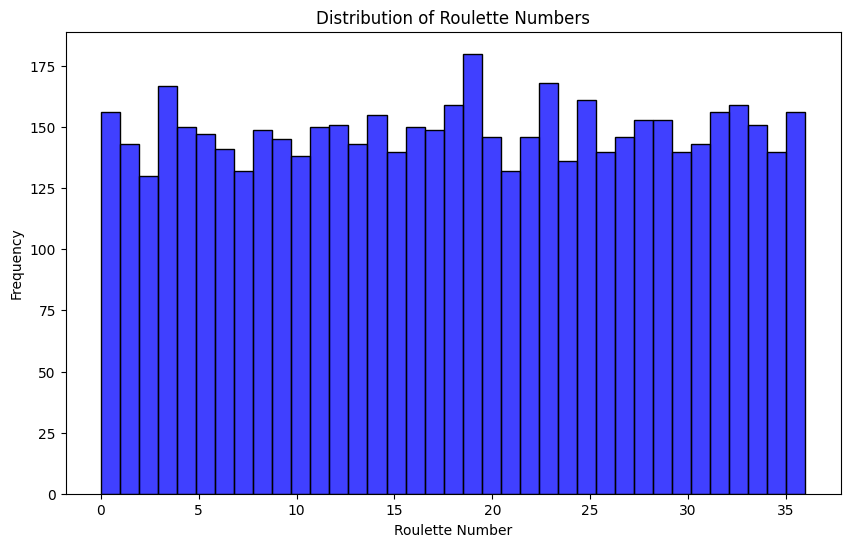

In [13]:
#plot distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Roulette_Number'], bins=37, kde=False, color='blue')
plt.title("Distribution of Roulette Numbers")
plt.xlabel("Roulette Number")
plt.ylabel("Frequency")
plt.show()

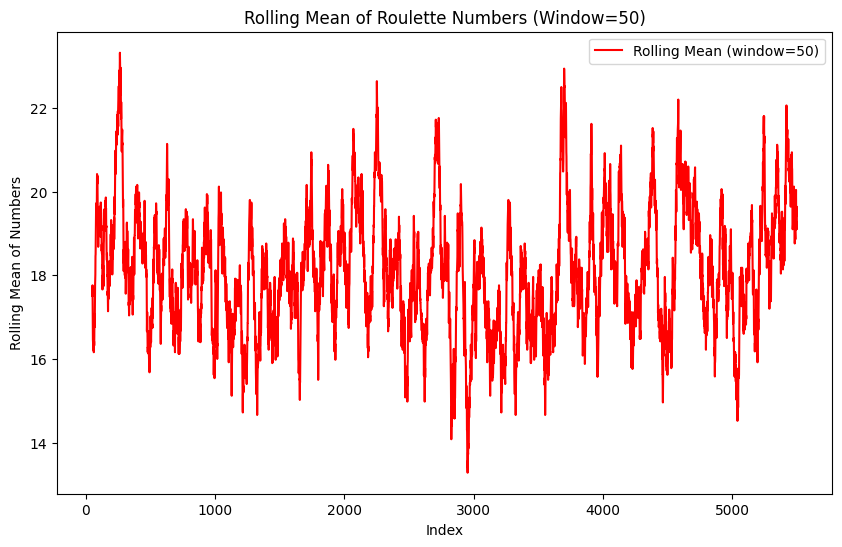

In [14]:
# Rolling mean

plt.figure(figsize=(10, 6))
rolling_mean = df['Roulette_Number'].rolling(window=50).mean()
plt.plot(rolling_mean, label=f"Rolling Mean (window={50})", color='red')
plt.title(f"Rolling Mean of Roulette Numbers (Window={50})")
plt.xlabel("Index")
plt.ylabel("Rolling Mean of Numbers")
plt.legend()
plt.show()

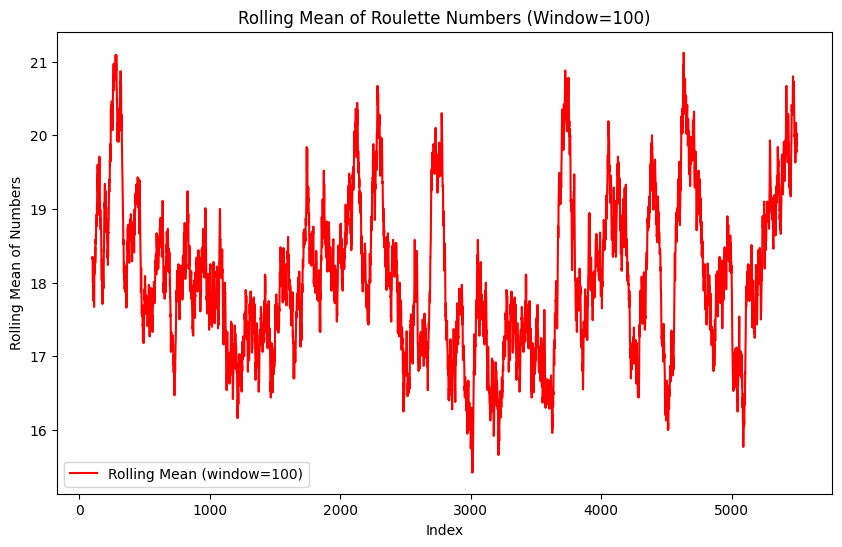

In [15]:
plt.figure(figsize=(10, 6))
rolling_mean = df['Roulette_Number'].rolling(window=100).mean()
plt.plot(rolling_mean, label=f"Rolling Mean (window={100})", color='red')
plt.title(f"Rolling Mean of Roulette Numbers (Window={100})")
plt.xlabel("Index")
plt.ylabel("Rolling Mean of Numbers")
plt.legend()
plt.show()

In [16]:
# Additional Analysis: Checking for any bias towards odd/even or high/low numbers
odd_count = sum(df['Roulette_Number'] % 2 != 0)
even_count = sum(df['Roulette_Number'] % 2 == 0)
high_count = sum(df['Roulette_Number'] > 18)
low_count = sum((df['Roulette_Number'] <= 18) & (df['Roulette_Number'] > 0))
zero_count = sum(df['Roulette_Number'] == 0)

In [18]:
print("\nAdditional Analysis:")
print(f"Odd numbers: {odd_count} ({odd_count/len(df)*100:.2f}%)")
print(f"Even numbers: {even_count} ({even_count/len(df)*100:.2f}%)")
print(f"High numbers (19-36): {high_count} ({high_count/len(df)*100:.2f}%)")
print(f"Low numbers (1-18): {low_count} ({low_count/len(df)*100:.2f}%)")
print(f"Zeros: {zero_count} ({zero_count/len(df)*100:.2f}%)")


Additional Analysis:
Odd numbers: 2698 (49.05%)
Even numbers: 2803 (50.95%)
High numbers (19-36): 2706 (49.19%)
Low numbers (1-18): 2639 (47.97%)
Zeros: 156 (2.84%)


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [20]:
df

,Roulette_Number,Dozen,Column,Color,Odd/Even,High/Low
0,22,2nd_12,1st_Column,Black,Even,High
1,5,1st_12,2nd_Column,Red,Odd,Low
2,28,3rd_12,1st_Column,Black,Even,High
3,35,3rd_12,2nd_Column,Black,Odd,High
4,30,3rd_12,3rd_Column,Red,Even,High
...,...,...,...,...,...,...
5496,6,1st_12,3rd_Column,Black,Even,Low
5497,36,3rd_12,3rd_Column,Red,Even,High
5498,3,1st_12,3rd_Column,Red,Odd,Low
5499,32,3rd_12,2nd_Column,Red,Even,High


In [23]:
df["Odd/Even"].replace({"Odd":0,"Even":1})

,Odd/Even
0,1
1,0
2,1
3,0
4,1
...,...
5496,1
5497,1
5498,0
5499,1


In [25]:
df.drop(["Dozen","Column","Color","High/Low"],axis=1,inplace=True)

In [27]:
X=df["Roulette_Number"]
y=df["Odd/Even"]

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [30]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [31]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
# Make predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Even', 'Odd']))

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

        Even       0.53      1.00      0.69       582
         Odd       0.00      0.00      0.00       519

    accuracy                           0.53      1101
   macro avg       0.26      0.50      0.35      1101
weighted avg       0.28      0.53      0.37      1101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
